# Check Modtran Output
====================================

- Sylvie Dagoret-Campagne
- date January 20th 2017


The 4 Modtran files received are compared together before making the comparison with LibRadtran

In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl

/Users/dagoret-campagnesylvie/.local/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
import pandas as pd
import os
import re
import numpy as np

In [3]:
modtran_path="modtran_samples/MT_FirstSamples"

In [4]:
file1='Airmass.1.5.kg.1.17.7.diff.mm.xlsx'
file2='H2O.O3.Molec.Atmo1.0.1.5.2.0.kg.1.19.17.xlsx'
file3='O3.Molec.Scat.4.Sylvie.1.19.17.kg.xlsx'
file4='Pachon_MODTRAN.1.5.kg.1.6.17.xlsx'

# Try to work with file Airmass.1.5.kg.1.17.7.diff.mm.xlsx
===================================================================================

- file at airmass $z=1.5$ for H2O set at 5mm 8mm 11mm

In [5]:
file=os.path.join(modtran_path,file1)

In [6]:
mtfile1 = pd.ExcelFile(file)
sheet_name=mtfile1.sheet_names[0]
df_colname1 = mtfile1.parse(sheet_name,index_row=0,usecols=range(0,4))
df1 = mtfile1.parse(sheet_name,header=1,usecols=range(0,4))
df1.columns = ["wl", "h2o_5mm","h2o_8mm","h2o_11mm"]

In [7]:
#df_colname1.head()

In [8]:
df1.head()

,wl,h2o_5mm,h2o_8mm,h2o_11mm
0,250.0,1.0,1.0,1.0
1,250.5,1.0,1.0,1.0
2,251.0,1.0,1.0,1.0
3,251.5,1.0,1.0,1.0
4,252.0,1.0,1.0,1.0


# Try to work with file H2O.O3.Molec.Atmo1.0.1.5.2.0.kg.1.19.17.xlsx
======================================================================================================

- file at airmass $z=1, 1.5, 2$
- H2O is 4mm
- O3 is 275 Db

In [9]:
file=os.path.join(modtran_path,file2)

In [10]:
mtfile2 = pd.ExcelFile(file)
sheet_name=mtfile2.sheet_names[0]
df_colname2 = mtfile2.parse(sheet_name,index_row=3,usecols=range(0,12))
df2 = mtfile2.parse(sheet_name,header=4,usecols=range(0,12))
df2.columns = ["wl", "z10_pwv4mm","z15_pwv4mm","z20_pwv4mm",
               "empty1",
               "z10_oz275","z15_oz275","z20_oz275", 
               "empty2",
               "z10_sc","z15_sc","z20_sc"]

In [11]:
#df_colname2

In [12]:
df2.head()

,wl,z10_pwv4mm,z15_pwv4mm,z20_pwv4mm,empty1,z10_oz275,z15_oz275,z20_oz275,empty2,z10_sc,z15_sc,z20_sc
0,250.0,1.0,1.0,1.0,NaN,0.0,0.0,0.0,NaN,0.1419,0.0536,0.0204
1,250.5,1.0,1.0,1.0,NaN,0.0,0.0,0.0,NaN,0.1444,0.0550,0.0211
2,251.0,1.0,1.0,1.0,NaN,0.0,0.0,0.0,NaN,0.1469,0.0565,0.0218
3,251.5,1.0,1.0,1.0,NaN,0.0,0.0,0.0,NaN,0.1495,0.0580,0.0226
4,252.0,1.0,1.0,1.0,NaN,0.0,0.0,0.0,NaN,0.1520,0.0594,0.0234


# Try to work with 'O3.Molec.Scat.4.Sylvie.1.19.17.kg.xlsx'
======================================================================================

In [13]:

file=os.path.join(modtran_path,file3)

In [14]:
mtfile3 = pd.ExcelFile(file)
sheet_name=mtfile3.sheet_names[0]
df_colname3 = mtfile3.parse(sheet_name,index_row=3,usecols=range(0,9))
df3 = mtfile3.parse(sheet_name,header=4,usecols=range(0,9))
df3.columns = ["wl","Empty1",
               "z10_oz275","z15_oz275","z20_oz275",
               "Empty2",
               "z10_sc","z15_sc","z20_sc"]

In [15]:
#df_colname3.head()

In [16]:
df3.head()

,wl,Empty1,z10_oz275,z15_oz275,z20_oz275,Empty2,z10_sc,z15_sc,z20_sc
0,250.0,NaN,0.0,0.0,0.0,NaN,0.1419,0.0536,0.0204
1,250.5,NaN,0.0,0.0,0.0,NaN,0.1444,0.0550,0.0211
2,251.0,NaN,0.0,0.0,0.0,NaN,0.1469,0.0565,0.0218
3,251.5,NaN,0.0,0.0,0.0,NaN,0.1495,0.0580,0.0226
4,252.0,NaN,0.0,0.0,0.0,NaN,0.1520,0.0594,0.0234


# Try to work with 'Pachon_MODTRAN.1.5.kg.1.6.17.xlsx'
====================================================================================


- this file has the particularity of having O2 which must be checked also together with Libradtran

In [17]:
file=os.path.join(modtran_path,file4)

In [18]:
mtfile4 = pd.ExcelFile(file)
sheet_name=mtfile4.sheet_names[0]
df_colname4 = mtfile4.parse(sheet_name,index_row=0,usecols=range(0,6))
df4 = mtfile4.parse(sheet_name,header=16,usecols=range(0,6))
df4.columns = ["wl","z15_comb","z15_pwv","z15_O2","z15_oz","z15_sc"]

In [19]:
df4.head()

,wl,z15_comb,z15_pwv,z15_O2,z15_oz,z15_sc
0,250.0,0.0,1.0,0.1014,0.0,0.0536
1,250.5,0.0,1.0,0.1154,0.0,0.0550
2,251.0,0.0,1.0,0.1305,0.0,0.0565
3,251.5,0.0,1.0,0.1466,0.0,0.0580
4,252.0,0.0,1.0,0.1639,0.0,0.0594


# 1) Check the compatibility of molecular scattering
--------------------------------------------------------------------

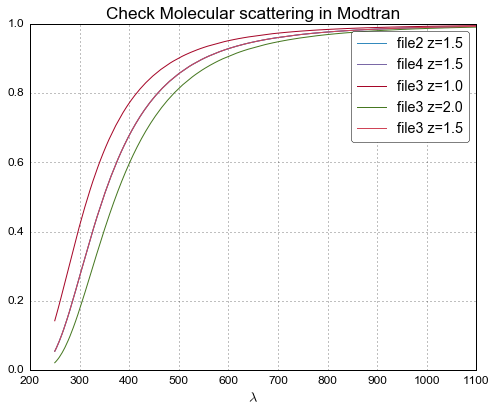

In [20]:
plt.figure()

x2=df2["wl"]
y2=df2["z15_sc"]

x3=df3["wl"]
y3=df3["z15_sc"]

x4=df4["wl"]
y4=df4["z15_sc"]

x5=df3["wl"]
y5=df3["z10_sc"]

x6=df3["wl"]
y6=df3["z20_sc"]

plt.plot(x2,y2,label='file2 z=1.5')
plt.plot(x4,y4,label='file4 z=1.5')
plt.plot(x5,y5,label='file3 z=1.0')
plt.plot(x6,y6,label='file3 z=2.0')
plt.plot(x3,y3,label='file3 z=1.5')
plt.xlabel("$\lambda$")
plt.title("Check Molecular scattering in Modtran")
plt.legend()
plt.grid(True)

The good point is that molecular scattering can be used to check if the airmass is the same for MT/RT

# 2) Check O2
-------------------

- only available at $z=1.5$ in file 4

In [21]:
x4=df4["wl"]
y4=df4["z15_O2"]

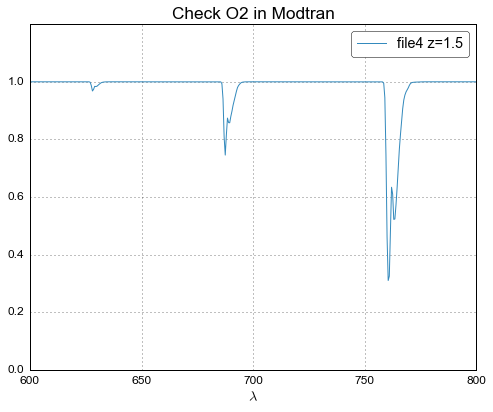

In [22]:
plt.figure()
plt.plot(x4,y4,label='file4 z=1.5')
plt.ylim(0.,1.2)
plt.xlim(600.,800.)
plt.xlabel("$\lambda$")
plt.title("Check O2 in Modtran")
plt.legend()
plt.grid(True)

Thus it has been cheched that this O2 profile is really at $z=1.5$
$O2$ is only available in file 3.
It is important to have also $O3$ in files because there is a disagreement Modtran/Libradtran on it.

# 3) Check Ozone
------------------------

In [23]:
x4=df4["wl"]
y4=df4["z15_oz"]

In [24]:
x2=df2["wl"]
y2=df2["z15_oz275"]

x5=df2["wl"]
y5=df2["z10_oz275"]

x6=df2["wl"]
y6=df2["z20_oz275"]



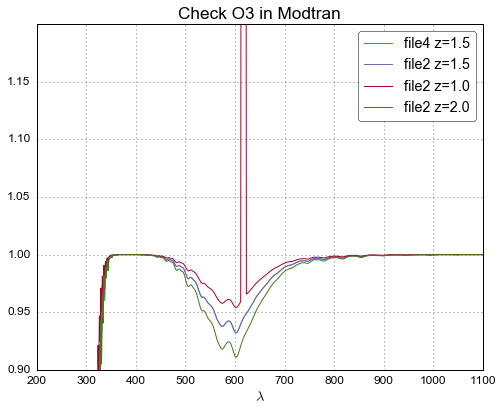

In [25]:
plt.figure()
plt.plot(x4,y4,label='file4 z=1.5')
plt.plot(x2,y2,label='file2 z=1.5')
plt.plot(x5,y5,label='file2 z=1.0')
plt.plot(x6,y6,label='file2 z=2.0')
plt.ylim(0.9,1.2)
#plt.xlim(600.,800.)
plt.xlabel("$\lambda$")
plt.title("Check O3 in Modtran")
plt.legend()
plt.grid(True)

## So O3 is corrupted  in file2 for z=1  !!!

# 4) Check H2O

## 4.1 Check H2O in file 2

In [26]:
x2=df2["wl"]
y2=df2["z15_pwv4mm"]

x5=df2["wl"]
y5=df2["z10_pwv4mm"]

x6=df2["wl"]
y6=df2["z20_pwv4mm"]

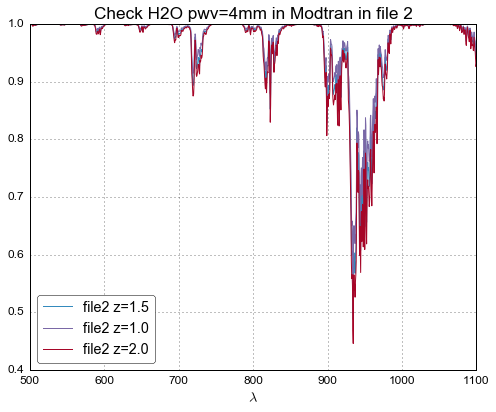

In [27]:
plt.figure()
plt.plot(x2,y2,label='file2 z=1.5')
plt.plot(x5,y5,label='file2 z=1.0')
plt.plot(x6,y6,label='file2 z=2.0')
#plt.ylim(0.9,1.2)
plt.xlim(500.,1100.)
plt.xlabel("$\lambda$")
plt.title("Check H2O pwv=4mm in Modtran in file 2")
plt.legend(loc='best')
plt.grid(True)

## 4.2) H2O  In file 1/file2

In [28]:
x1=df1["wl"]
y1=df1["h2o_5mm"]
y11=df1["h2o_8mm"]
y111=df1["h2o_11mm"]

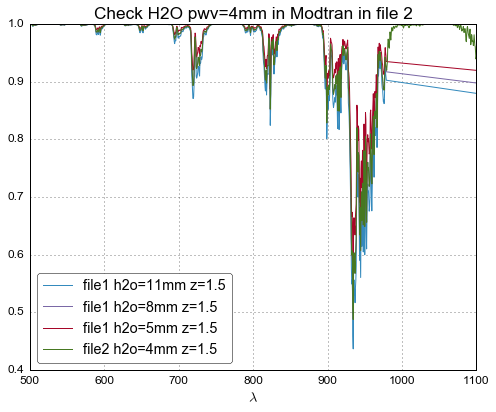

In [29]:
plt.figure()

plt.plot(x1,y111,label='file1 h2o=11mm z=1.5')
plt.plot(x1,y11,label='file1 h2o=8mm z=1.5')
plt.plot(x1,y1,label='file1 h2o=5mm z=1.5')
plt.plot(x2,y2,label='file2 h2o=4mm z=1.5')
plt.xlim(500.,1100.)
plt.xlabel("$\lambda$")
plt.title("Check H2O pwv=4mm in Modtran in file 2")
plt.legend(loc='best')
plt.grid(True)

### Why in file 1, the wavelengthes are cut so short ? It should goes at least up to 1000 nm if not 1100nm !